# Фундаментальные концепции ИИ
# Лабораторная работа 2
## Глобальная оптимизация и метаэврестические алгоритмы

**Выполнил Моисеенков Илья, М8О-114М-23**

Задание:
В Pygmo запрогроммировать две своих тестовых функции и найти их оптимум 3 разными алгоритмами доступными в библиотеке и получить таблицу сравнения

Будем рассматривать две функции оптимизации:
1. Функция сферы
2. Функция Леви N 13

[Подробнее про функции](https://ru.wikipedia.org/wiki/Тестовые_функции_для_оптимизации)

In [2]:
!pip install -q pygmo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 8.8 MB/s eta 0:00:00


In [3]:
import numpy as np
from matplotlib import pyplot as plt
import pygmo as pg

In [10]:
class Sphere:
    @staticmethod
    def fitness(d):
        return [d[0]**2 + d[1]**2]

    @staticmethod
    def get_bounds():
        return ([-3., -3.], [3., 3.])

    @staticmethod
    def get_glob_min():
        return np.array([0, 0, 0])

In [11]:
class Levi:
    @staticmethod
    def fitness(d):
        return [np.sin(3 * np.pi * d[0])**2 + (d[0] - 1)**2 * (1 + np.sin(3 * np.pi * d[1])**2) + (d[1] - 1)**2 * (1 + np.sin(2 * np.pi * d[1])**2)]

    @staticmethod
    def get_bounds():
        return ([-10., -10.], [10., 10.])

    @staticmethod
    def get_glob_min():
        return np.array([1, 1, 0])

Код для визуализации

In [12]:
def visualize_optimization(function, algorithm, title, population_size=100, generations_cnt=100):
    pop = pg.population(function, population_size)

    fitness_list = []
    for i in range(generations_cnt):
        pop = algorithm.evolve(pop)
        fitness_list.append(pop.get_f()[pop.best_idx()])

    gens = np.linspace(0, generations_cnt, generations_cnt)
    fitness_list = np.array(fitness_list)

    fig = plt.figure(figsize = (10, 5))
    ax = plt.axes()

    ax.plot(gens, fitness_list, '-', marker='.', label="Best result")
    ax.plot(gens, np.full(len(gens), function.get_glob_min()[2]), '--', lw=2, label="Global min")

    ax.set_title(title)
    ax.set_xlabel("Generation")
    ax.set_ylabel("Fitness")
    ax.legend()

    return pop.get_x()[pop.best_idx()], pop.get_f()[pop.best_idx()]

### SGA

(array([-0.00203568, -0.01105113]), array([0.00012627]))

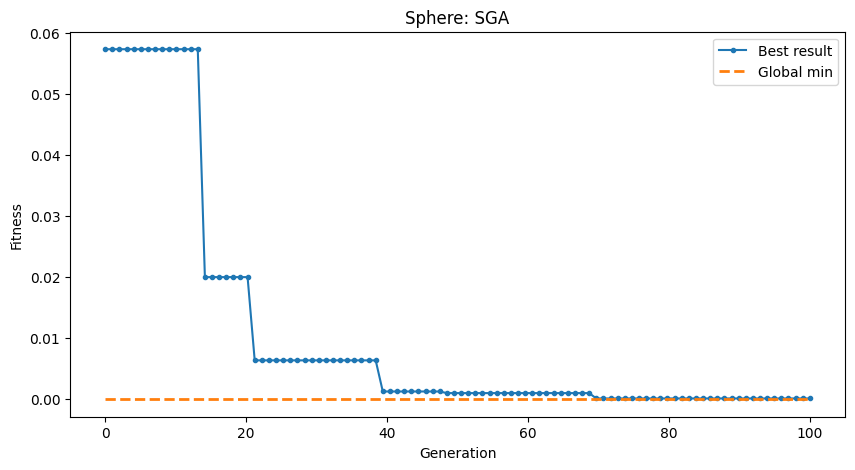

In [22]:
visualize_optimization(Sphere(), pg.algorithm(pg.sga(1)), 'Sphere: SGA')

(array([1.00665724, 1.00142799]), array([0.00397789]))

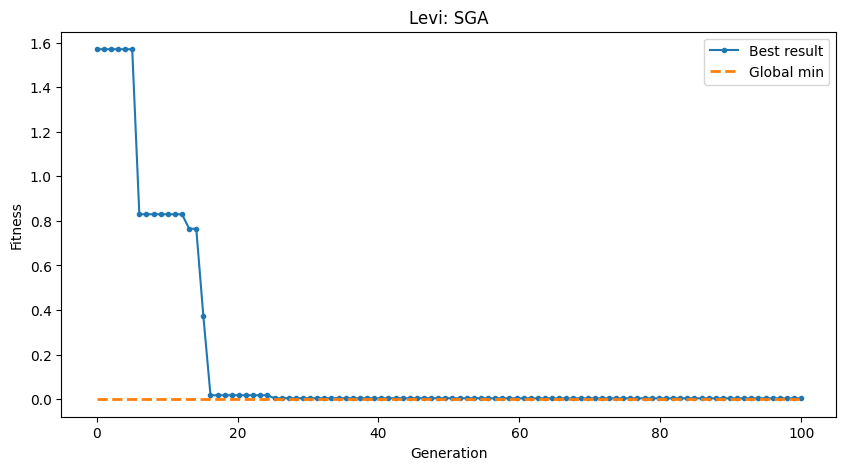

In [25]:
visualize_optimization(Levi(), pg.algorithm(pg.sga(1)), 'Levi: SGA')

Simple Genetic Algorithm справился с задачей

### DE

(array([-1.88133828e-10, -1.31975340e-09]), array([1.77714338e-18]))

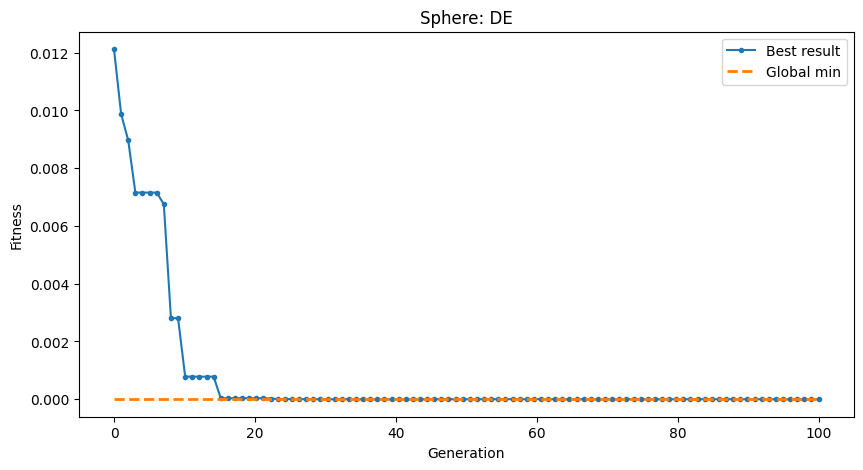

In [17]:
visualize_optimization(Sphere(), pg.algorithm(pg.de(1)), 'Sphere: DE')

(array([0.99999999, 0.99999997]), array([9.44396011e-15]))

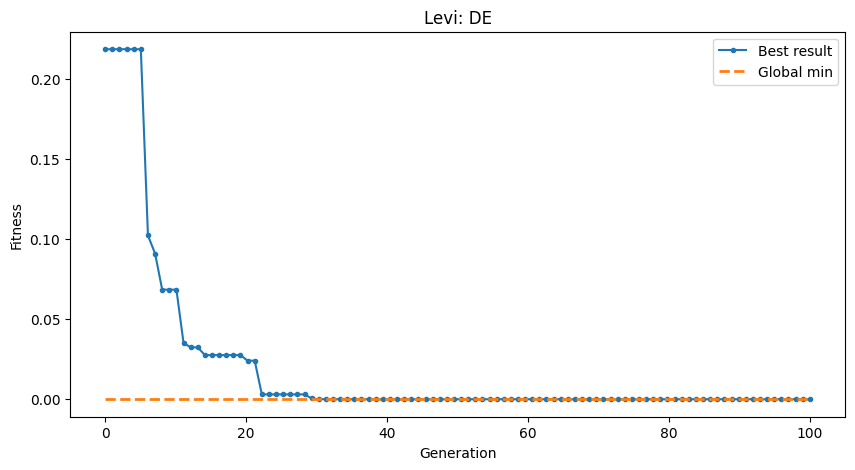

In [20]:
visualize_optimization(Levi(), pg.algorithm(pg.de(1)), 'Levi: DE')

С помощью Differential Evolution мы тоже смогли найти точку минимума

### SADE

(array([-2.94925393e-12, -9.87465020e-12]), array([1.06206815e-22]))

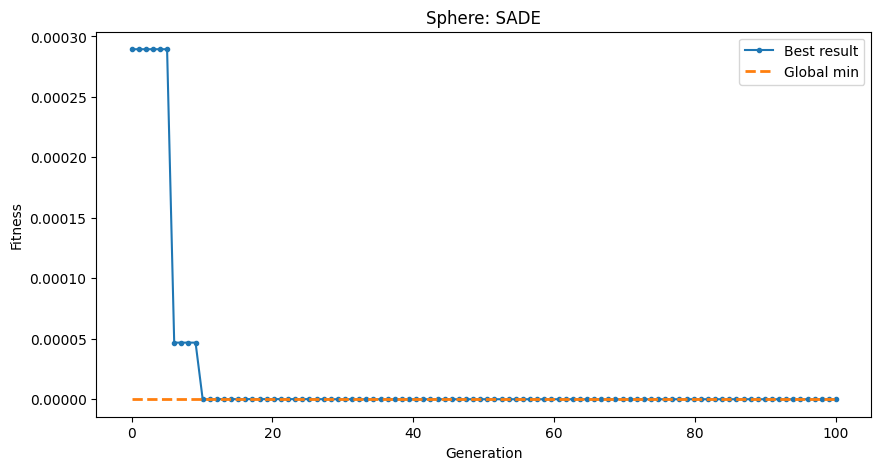

In [26]:
visualize_optimization(Sphere(), pg.algorithm(pg.sade(1)), 'Sphere: SADE')

(array([1., 1.]), array([3.96697599e-19]))

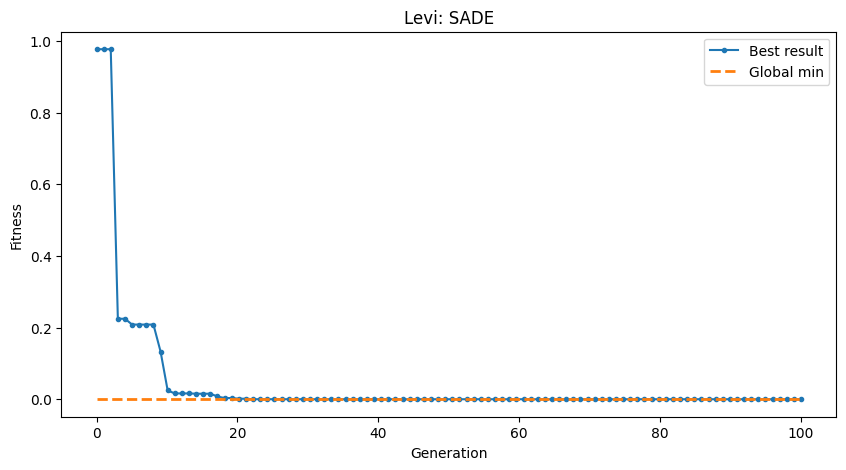

In [27]:
visualize_optimization(Levi(), pg.algorithm(pg.sade(1)), 'Levi: SADE')

Self adavptive вариант тоже справился с задачей

# Вывод

В данной работе были изучены некоторые метаэвристические алгоритмы оптимизации. Они все справились с задачей поиска минимума функции. Но при этом нужно понимать, что вычислительно они гораздо более сложные